In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
tesla = pd.read_csv('TSLA.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-20,332.690002,333.100006,325.040009,328.980011,328.980011,5953800
1,2017-12-21,329.589996,333.739990,327.209991,331.660004,331.660004,4385200
2,2017-12-22,329.510010,330.920013,324.820007,325.200012,325.200012,4215800
3,2017-12-26,323.829987,323.940002,316.579987,317.290009,317.290009,4378400
4,2017-12-27,316.000000,317.679993,310.750000,311.640015,311.640015,4712100


In [3]:
signal = np.copy(tesla.Close.values)

In [4]:
def moving_average(signal, period):
    buffer = []
    for i in range(period, len(signal)):
        buffer.append(signal[i - period : i].mean())
    return buffer

In [5]:
def auto_regressive(signal, p, d, q, future_count = 10):
    """
    p = the order (number of time lags)
    d = degree of differencing
    q = the order of the moving-average
    """
    buffer = np.copy(signal).tolist()
    for i in range(future_count):
        ma = moving_average(np.array(buffer[-p:]), q)
        forecast = buffer[-1]
        for n in range(0, len(ma), d):
            forecast -= buffer[-1 - n] - ma[n]
        buffer.append(forecast)
    return buffer

In [6]:
future_count = 15

In [7]:
predicted_15 = auto_regressive(signal,15,1,2,future_count)
predicted_30 = auto_regressive(signal,30,1,2,future_count)

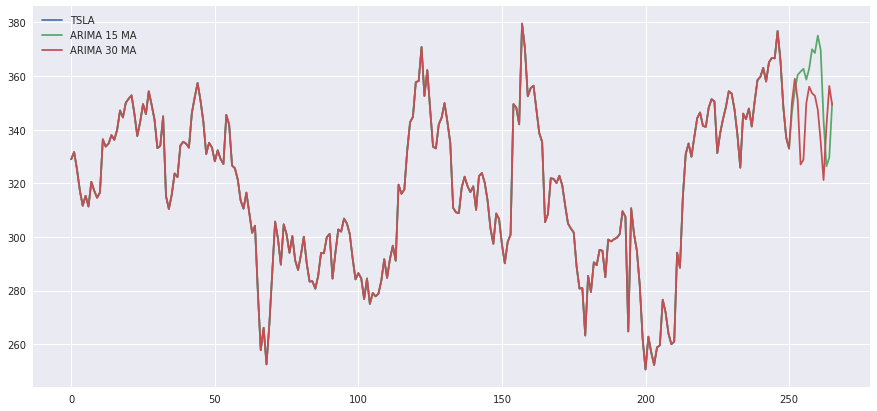

In [8]:
plt.figure(figsize=(15, 7))
plt.plot(signal, label = 'TSLA')
plt.plot(predicted_15, label = 'ARIMA 15 MA')
plt.plot(predicted_30, label = 'ARIMA 30 MA')
plt.legend()
plt.show()